In [1]:
import torch
import matplotlib.pyplot as plt
import cv2 as cv
torch.cuda.empty_cache()

In [2]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 36.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [ ]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best.pt', force_reload=True)

In [ ]:
!pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# extract data
!unzip -q /content/drive/MyDrive/Violence_data/FINAL_VIO_FILTER_SH.zip

In [ ]:
import os
import shutil


img_src = r"/content/VIO_2/train/images"

labels_path = r"/content/VIO_2/train/labels"




for img in os.listdir(img_src):

    ext = img.split('.')[-1]

    ind = len(ext)*-1
    ind -=1

    if img[:ind]+'.txt' not in os.listdir(labels_path):

        os.remove(os.path.join(img_src , img))


# for label in os.listdir(labels_path):

#   with open(os.path.join( labels_path , label )) as file:

#     if len(file.read()) == 0:
#       os.remove(os.path.join(labels_path , label))



In [ ]:
len(os.listdir(labels_path))

7047

In [ ]:
!zip "/content/drive/MyDrive/Violence_data/vio_no_bg.zip" -r "/content/VIO_2"

In [ ]:
!unzip -q "/content/drive/MyDrive/Violence_data/vio_no_bg.zip"

## resuming training of model

## Testing

In [ ]:
mod = YOLO("/content/drive/MyDrive/violence_last_dance_check/train/weights/best.pt")

In [ ]:
mod.val(plots=True)


Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/VIO_2/valid/labels.cache... 1573 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:50<00:00,  1.97it/s]
                   all       1573       1629      0.863      0.827      0.903      0.607
Speed: 0.5ms preprocess, 21.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f0d08d2b190>
fitness: 0.6369868043501843
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.60741])
names: {0: 'violence'}
plot: True
results_dict: {'metrics/precision(B)': 0.8625467237483424, 'metrics/recall(B)': 0.8268876611418048, 'metrics/mAP50(B)': 0.9031416241435853, 'metrics/mAP50-95(B)': 0.6074140465953619, 'fitness': 0.6369868043501843}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.5270067628446992, 'inference': 21.220674502644957, 'loss': 0.002007232830923072, 'postprocess': 1.840185376389801}

In [ ]:
results2 = mod.predict(source = "/content/VID_20230609_200215.mp4" , save = True , agnostic_nms = True , conf = .5  , augment = True)

In [ ]:
box = results2[0].boxes
box.conf
box.cls[0]

tensor(0., device='cuda:0')

In [ ]:
resvio = model("/content/vio_cap5a6a733a-086c-11ee-b3c5-5c260a488791.jpg")


image 1/1 /content/vio_cap5a6a733a-086c-11ee-b3c5-5c260a488791.jpg: 640x640 1 violence, 46.6ms
Speed: 4.2ms preprocess, 46.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


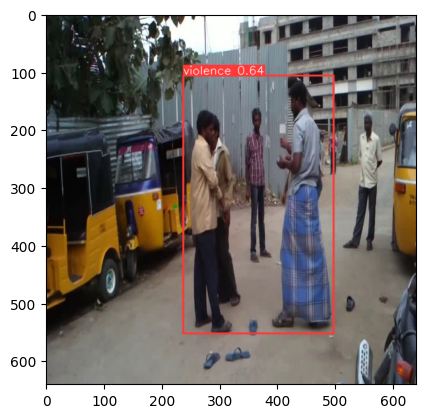

In [ ]:
img = resvio[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
model = YOLO("/content/drive/MyDrive/Violence_data/salwa_with_aug/train/weights/best.pt")

In [ ]:
model.train( resume = True )

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Violence_data/salwa_with_aug/train/weights/last.pt, data=/content/drive/MyDrive/Violence_data/v.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Violence_data/salwa_with_aug, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=True, agnostic_nms=True, classes=None, reti

## train from pre-trained weights

In [4]:
model = YOLO("/content/drive/MyDrive/Violence_data/salwa_with_aug/train/weights/best.pt")

In [ ]:
results = model.train(data = '/content/drive/MyDrive/Violence_data/vio_filter.yaml' , project = "/content/drive/MyDrive/Violence_data/final_filter_vio_sh" ,
                      val = False ,
                      epochs = 100 ,
                      augment = True ,
                      cos_lr = True ,
                      agnostic_nms = True ,
                      batch = 64 ,
                      imgsz = 416 ,
                      optimizer = "Adamax",
                      lr0 = 0.001,
                      hsv_h = 0.8,
                      hsv_s = 0.8,
                      hsv_v = 0.8,
                      degrees =  1.0,
                      translate = 1.0,
                      scale = 0.9,
                      shear = 0.8,
                      flipud = 1.0,
                      fliplr = 1.0,
                      mosaic = 1.0,
                      mixup = 1.0,
                      copy_paste = 0.9)

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Violence_data/vio_filter.yaml, epochs=100, patience=50, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Violence_data/final_filter_vio_sh, name=None, exist_ok=False, pretrained=False, optimizer=Adamax, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=True, agnostic_nms=True, classes=None, retina_masks=False, 

KeyboardInterrupt: ignored

In [ ]:
model.train(resume = True)

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Violence_data/final_filter_vio_sh/train2/weights/best.pt, data=/content/drive/MyDrive/Violence_data/vio_filter.yaml, epochs=100, patience=50, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Violence_data/final_filter_vio_sh, name=None, exist_ok=False, pretrained=False, optimizer=Adamax, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False

In [ ]:
model.val(plots = True)

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/content/VIO_2/valid/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]
                   all        112        117      0.713       0.68      0.699      0.329
Speed: 4.1ms preprocess, 7.2ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/val4


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fb788600f70>
fitness: 0.36634237747232096
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.32933])
names: {0: 'violence'}
plot: True
results_dict: {'metrics/precision(B)': 0.7132738518033171, 'metrics/recall(B)': 0.6804007814152884, 'metrics/mAP50(B)': 0.6994350298583756, 'metrics/mAP50-95(B)': 0.3293320827627593, 'fitness': 0.36634237747232096}
save_dir: PosixPath('runs/detect/val4')
speed: {'preprocess': 4.08771208354405, 'inference': 7.240667939186096, 'loss': 0.0012027365820748465, 'postprocess': 8.99040060383933}

In [31]:
vio_aug = model("https://cdn.images.express.co.uk/img/dynamic/78/590x/London-protest-trump-756980.jpg")


Found https://cdn.images.express.co.uk/img/dynamic/78/590x/London-protest-trump-756980.jpg locally at London-protest-trump-756980.jpg
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/London-protest-trump-756980.jpg: 384x640 1 violence, 37.9ms
Speed: 2.6ms preprocess, 37.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera

In [32]:
model.predict(source = '/content/London-protest-trump-756980.jpg' , save = True )

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/London-protest-trump-756980.jpg: 384x640 1 violence, 51.2ms
Speed: 4.2ms preprocess, 51.2ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'violence'}
 orig_img: array([[[ 59,  94, 138],
         [ 62,  97, 141],
         [ 64, 100, 146],
         ...,
         [ 42,  62,  87],
         [ 41,  61,  86],
         [ 42,  59,  85]],
 
        [[ 63,  98, 142],
         [ 66, 101, 145],
         [ 68, 104, 150],
         ...,
         [ 39,  59,  84],
         [ 38,  58,  83],
         [ 39,  56,  82]],
 
        [[ 61,  96, 140],
         [ 65, 100, 144],
         [ 67, 103, 149],
         ...,
         [ 36,  56,  81],
         [ 34,  54,  79],
         [ 35,  52,  78]],
 
        ...,
 
        [[  4,   6,   7],
         [  5,   7,   8],
         [  7,   9,  10],
         ...,
         [ 13,  17,  22],
         [ 11,  15,  20],
         [ 10,  14,  19]],
 
        [[  3,   5,   6],
         [  4,   6,   7],
         [  6,   8,   9],
         ...,


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camer

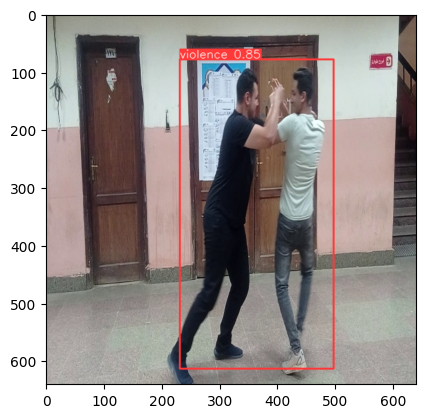

In [6]:
img = vio_aug[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## testing another | pretrained violence

In [ ]:
results = YOLO("/content/drive/MyDrive/Violence_data/final_filter_vio_sh/train3/weights/last.pt")

In [ ]:
results.train(resume = True)

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Violence_data/final_filter_vio_sh/train3/weights/last.pt, data=/content/drive/MyDrive/Violence_data/vio_filter.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Violence_data/final_filter_vio_sh, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, 

KeyboardInterrupt: ignored

In [ ]:
results.val(plots = True)

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/VIO_2/valid/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.21s/it]
                   all        112        117      0.844      0.709       0.82      0.462
Speed: 9.5ms preprocess, 22.0ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/detect/val3


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fefe32d60e0>
fitness: 0.49772808187842504
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46192])
names: {0: 'violence'}
plot: True
results_dict: {'metrics/precision(B)': 0.8440287744038621, 'metrics/recall(B)': 0.7094017094017094, 'metrics/mAP50(B)': 0.8199796228524264, 'metrics/mAP50-95(B)': 0.46192235510353596, 'fitness': 0.49772808187842504}
save_dir: PosixPath('runs/detect/val3')
speed: {'preprocess': 9.460289563451495, 'inference': 22.03937300613948, 'loss': 0.0012942722865513393, 'postprocess': 7.822730711528234}

In [ ]:
model = YOLO("/content/drive/MyDrive/yolov8_test/run_with_augment/train/weights/best.pt")

In [ ]:
model.predict(source="/content/self_caps_imgs" , save=True , save_txt = True)

In [ ]:
res = model("/content/IMG_20230610_175406.jpg")


image 1/1 /content/IMG_20230610_175406.jpg: 640x480 1 violence, 146.6ms
Speed: 4.1ms preprocess, 146.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
img = res[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
%cp -r /content/runs/detect/predict/VID_20230420_192106.mp4 drive/MyDrive/yolov8_test

In [ ]:
results = model('/content/VID_20230420_192106.mp4')

In [ ]:
!python /content/yolov5/detect.py --weights /content/drive/MyDrive/best.pt --source /content/VID_20230420_192106.mp4

In [ ]:
!zip "/content/labels.zip" -r "/content/runs/detect/predict"

## Testing weapons class

In [38]:
wep = YOLO("/content/drive/MyDrive/test/train6/weights/best.pt")

In [40]:
results = wep.predict(source = "/content/photo_2023-05-25_21-32-49.jpg" , save = True , agnostic_nms = True )


image 1/1 /content/photo_2023-05-25_21-32-49.jpg: 416x320 1 wepons, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict3


In [14]:
rwep = wep("/content/photo_2023-05-25_21-32-49.jpg")


image 1/1 /content/photo_2023-05-25_21-32-49.jpg: 416x320 1 wepons, 67.9ms
Speed: 1.7ms preprocess, 67.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


In [ ]:
box = results2[0].boxes
box.conf
box.cls[0]

NameError: ignored

In [ ]:
img = rwep[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## testing weapon & violence class

In [25]:
wv = YOLO("/content/drive/MyDrive/test/train4/weights/best.pt")

In [45]:
results = wv.predict(source = "/content/main-qimg-29be627d7e8429acd67dda6b15975a14-lq.jpeg" , save = True , agnostic_nms = True )


image 1/1 /content/main-qimg-29be627d7e8429acd67dda6b15975a14-lq.jpeg: 288x416 1 Weapon, 10.2ms
Speed: 1.4ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2


In [35]:
resvw = wv("https://www.recoilweb.com/wp-content/uploads/2021/07/Knife-to-a-Gunfight-9-675x450.jpg")


100%|██████████| 64.5k/64.5k [00:00<00:00, 11.5MB/s]
image 1/1 /content/Knife-to-a-Gunfight-9-675x450.jpg: 288x416 1 Violence, 1 Weapon, 24.1ms
Speed: 8.1ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


In [ ]:
class_name = [
    'Violence' ,
    'Weapon'
]

In [ ]:
results = results[0].cuda()
results = results.cpu()
results = results.to('cpu')
results = results.numpy()

NameError: ignored

In [ ]:
import numpy as np
box = results[0].boxes


cls = int(box.cls[0])
print(box.conf)
for i in range(len(box.conf)):
    print(f" the image has {class_name[i]} object on it")

NameError: ignored

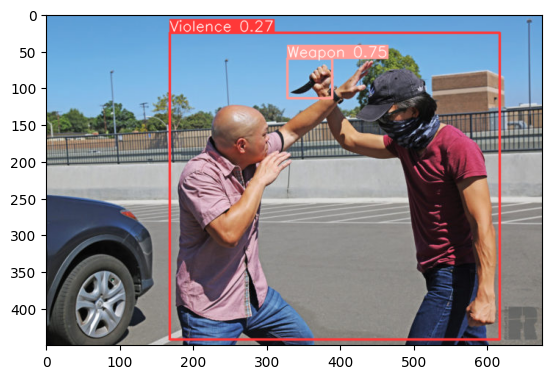

In [36]:
img = resvw[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## testing fire_smoke model

In [4]:
fs_model = YOLO("/content/drive/MyDrive/test/final_fire&smoke_run/train/weights/best.pt")

In [24]:
fr_res = fs_model.predict(source = "/content/House-fire-statistics.jpg" , save = True  )


image 1/1 /content/House-fire-statistics.jpg: 256x416 4 fires, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


In [22]:
fr_res = fs_model("https://www.bankrate.com/2022/04/19102915/House-fire-statistics.jpg")


100%|██████████| 106k/106k [00:00<00:00, 9.08MB/s]
image 1/1 /content/House-fire-statistics.jpg: 256x416 4 fires, 119.3ms
Speed: 1.8ms preprocess, 119.3ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)


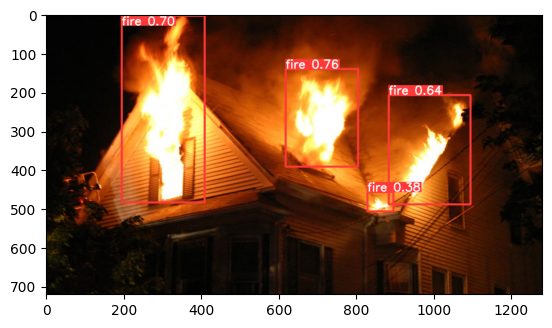

In [23]:
img = fr_res[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Weapon , Violence , Fire , Smoke model

In [4]:
model = YOLO("/content/drive/MyDrive/test/train6/val2/weights/best.pt")

In [15]:
fswv = model("/content/images (2).jpeg")


image 1/1 /content/images (2).jpeg: 320x416 1 Smoke, 36.0ms
Speed: 1.8ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)


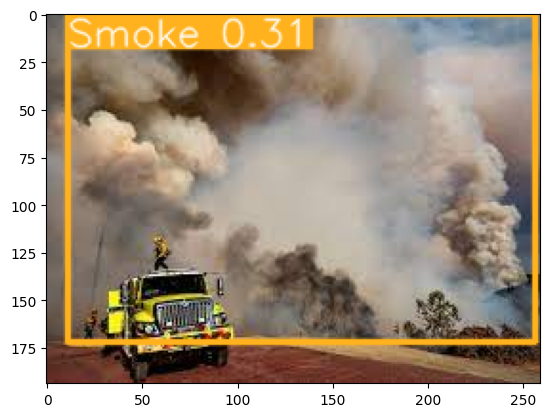

In [16]:
img = fswv[0].plot()
# img = plt.imshow(img,cmap='gray')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()